In [1]:
from pdf2image import convert_from_path
import numpy as np
import pytesseract as pt
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def area(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (max(x)-min(x))*(max(y)-min(y))

def start_point(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (min(x),max(y))

def end_point(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (max(x),min(y))

def get_points(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (min(x),max(x),min(y),max(y))

def remove_table(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            if (area(approx)>1000):
#                 print(area(approx))
                cv2.rectangle(image, start_point(approx),end_point(approx), (255, 255, 255), -1)
    return image

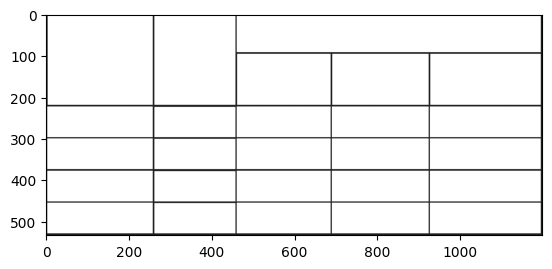

In [30]:
# plt.imshow(remove_table(tables[1][0]))
# plt.imshow(remove_table(tables[24][0]))
# plt.imshow(remove_table(tables[26][0]))

In [3]:
def get_all_points(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    coordinates = []
    for contour in contours:
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            if (area(approx)>150000):
                coordinates.append(get_points(approx))
#                 print(area(approx))
#                 cv2.rectangle(image, start_point(approx),end_point(approx), (0, 255, 255), 5)
    return coordinates

def get_tables(image):
    coordinates = get_all_points(image)
#     print(len(coordinates))
    tables = []
    for coordinate in coordinates:
        tables.append(image[coordinate[2]:coordinate[3],coordinate[0]:coordinate[1]])
    return tables

In [9]:
images = convert_from_path('data_books/punjabi/pp_fruits_notes_pbi.pdf',dpi=300)
tables = [get_tables(np.array(image)) for image in images]

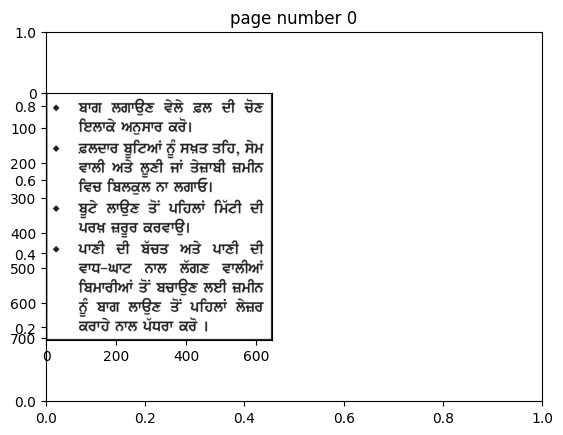

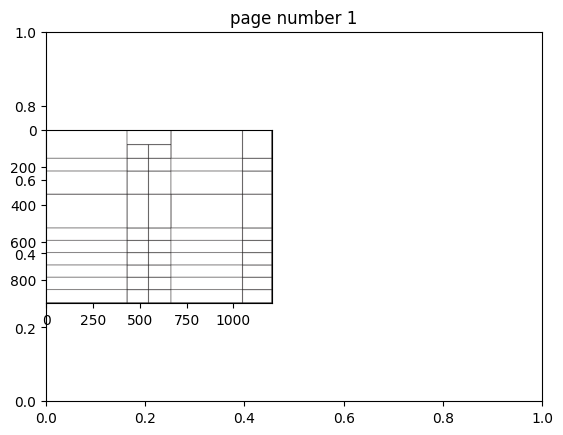

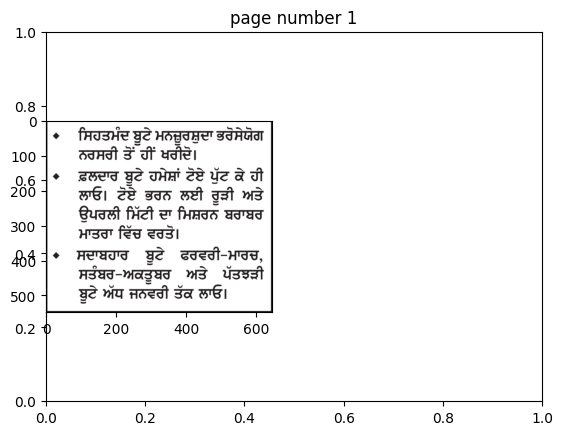

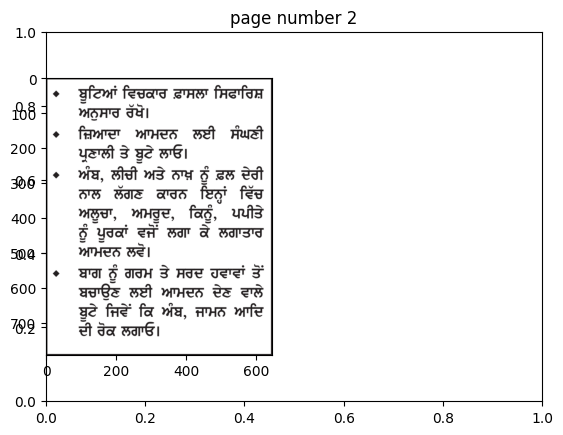

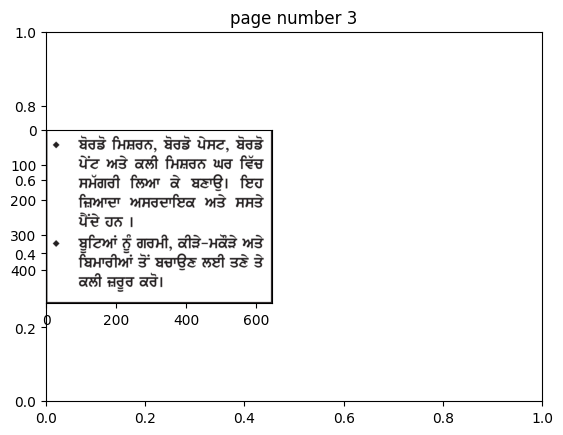

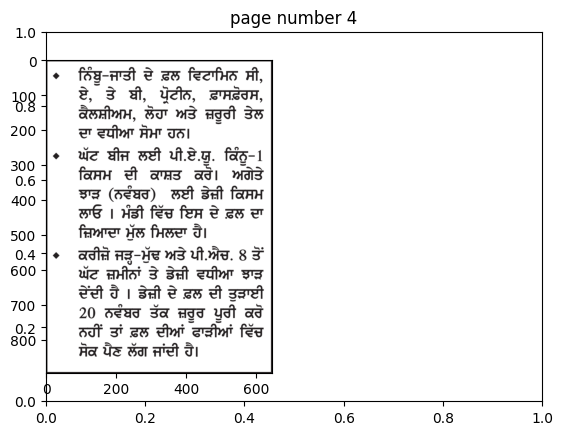

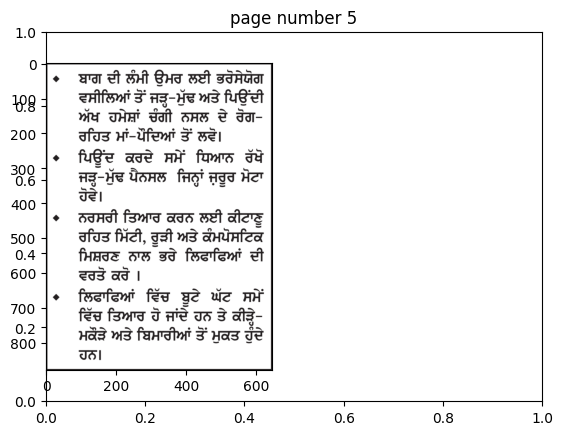

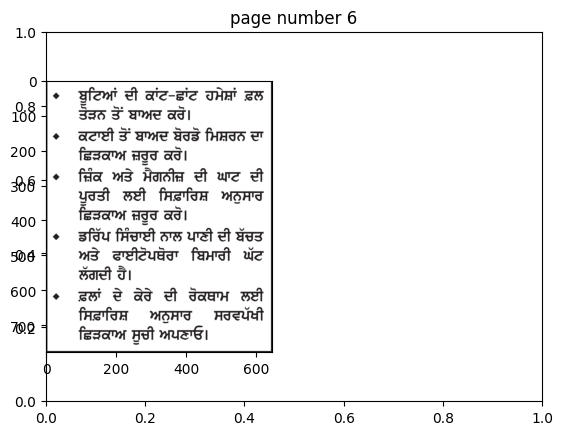

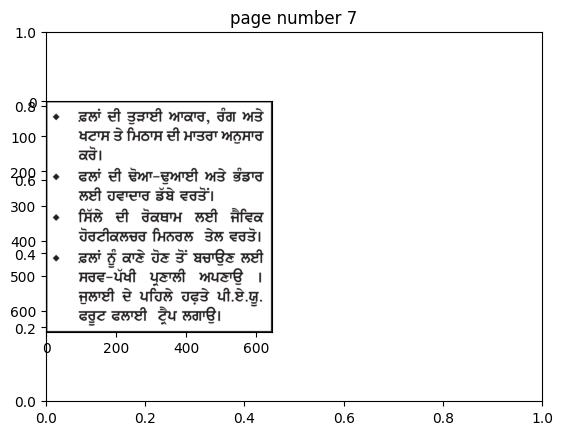

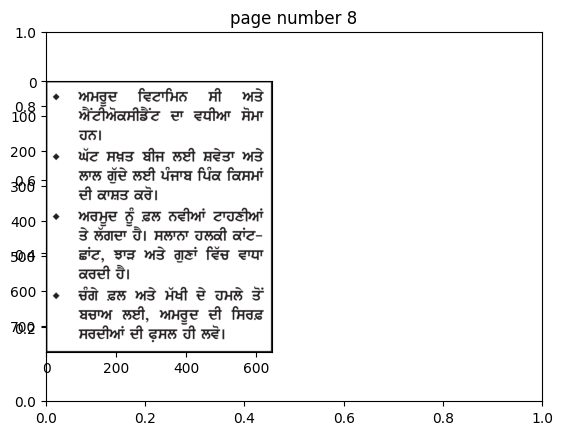

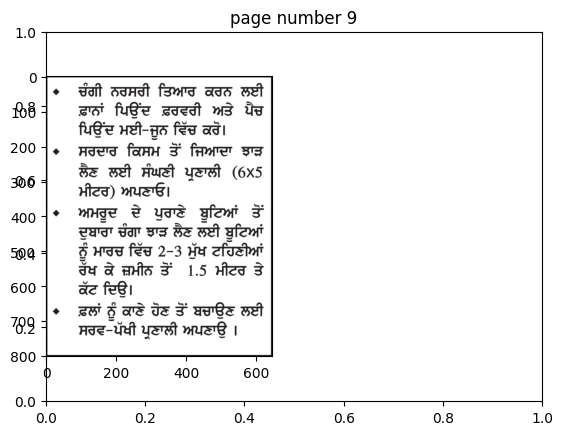

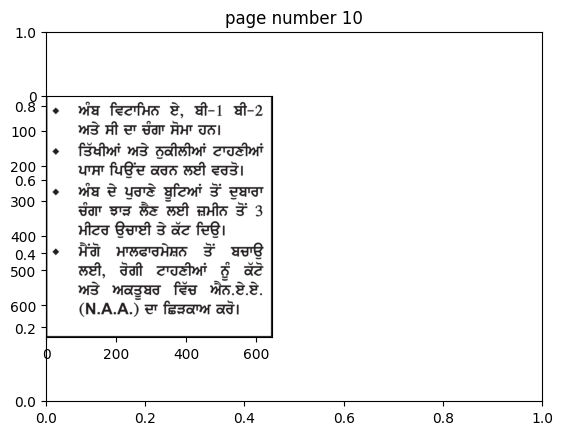

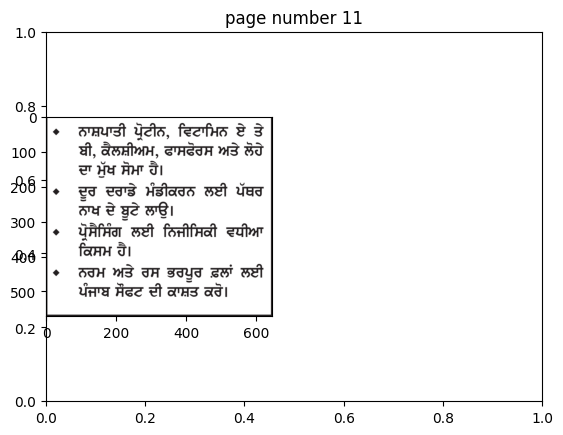

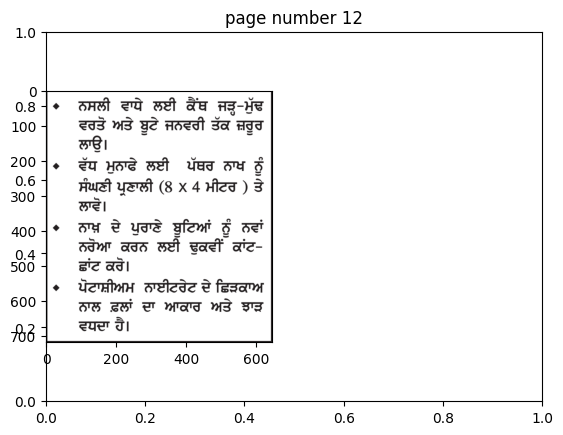

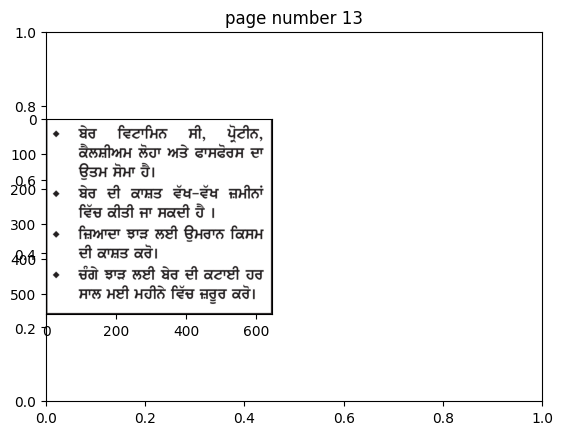

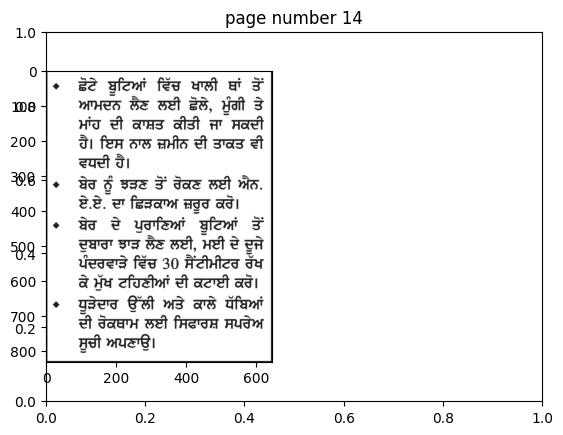

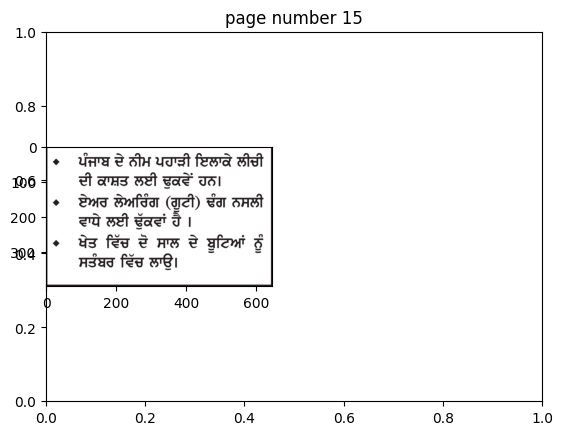

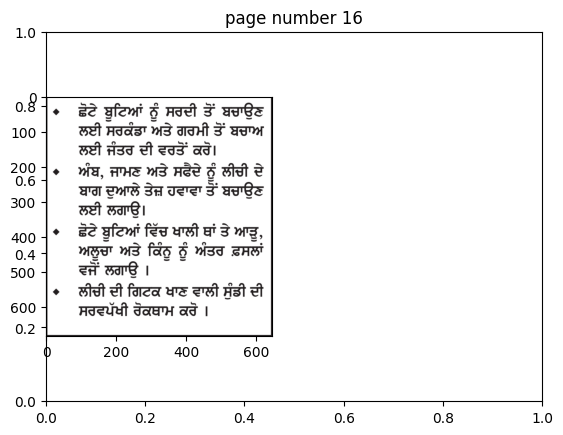

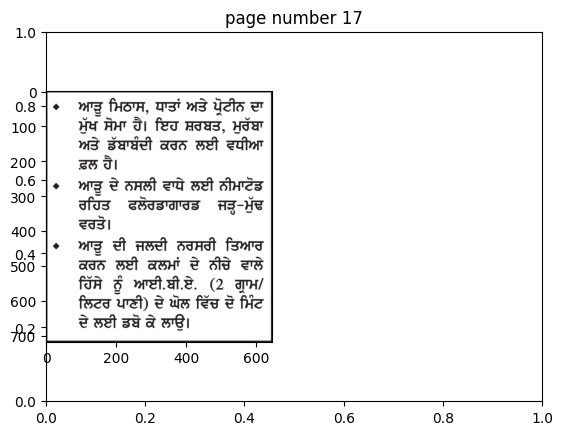

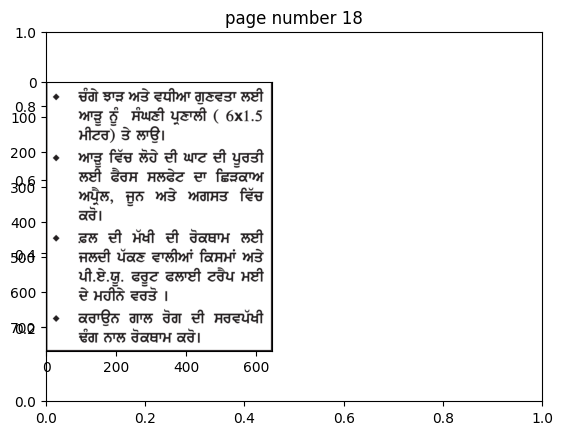

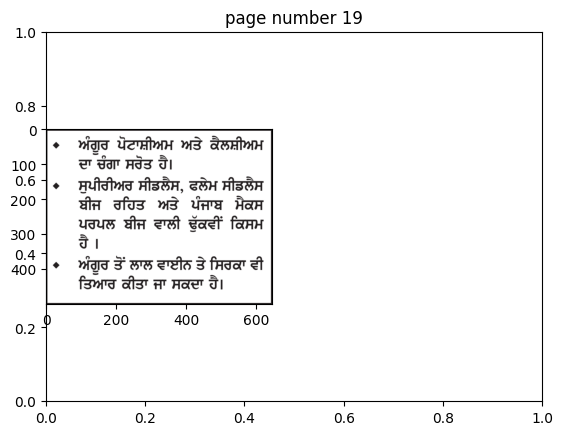

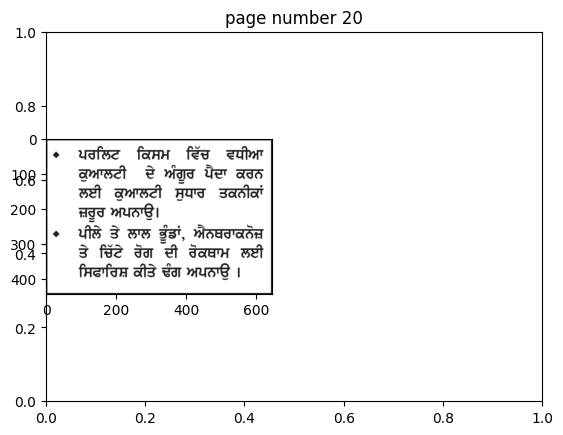

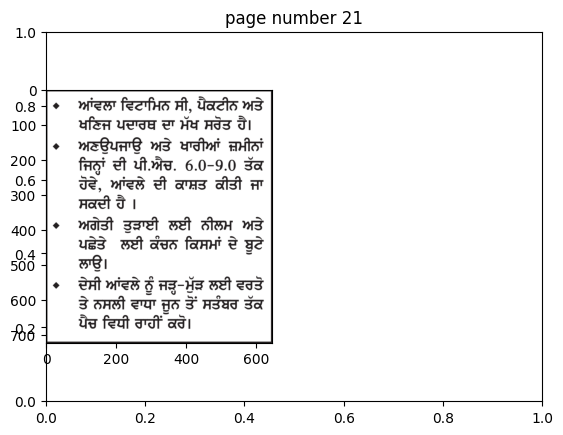

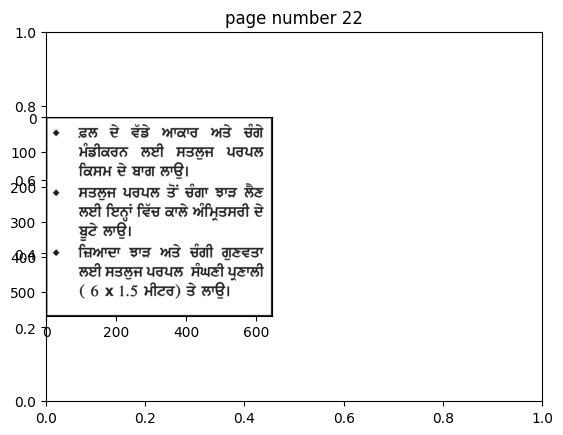

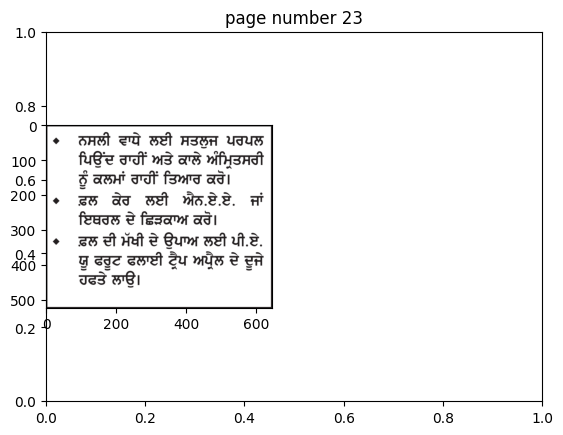

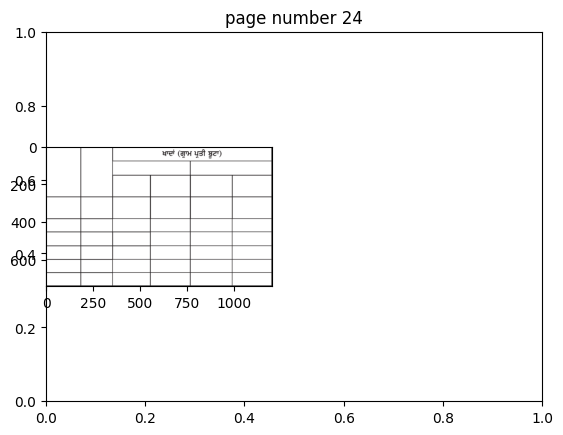

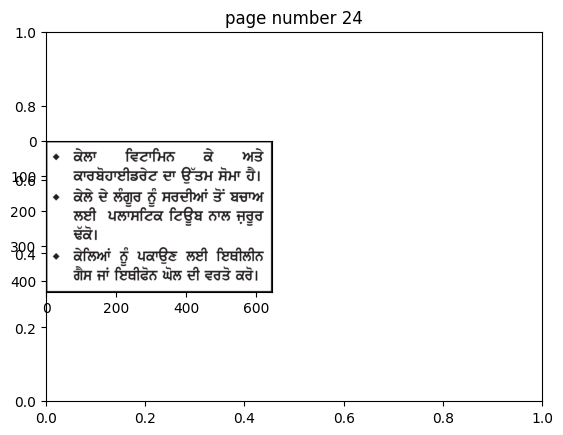

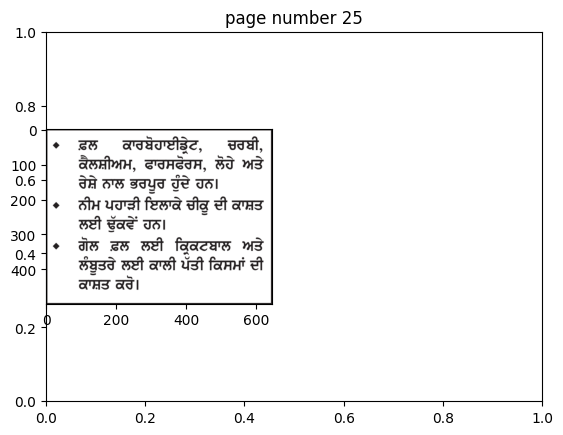

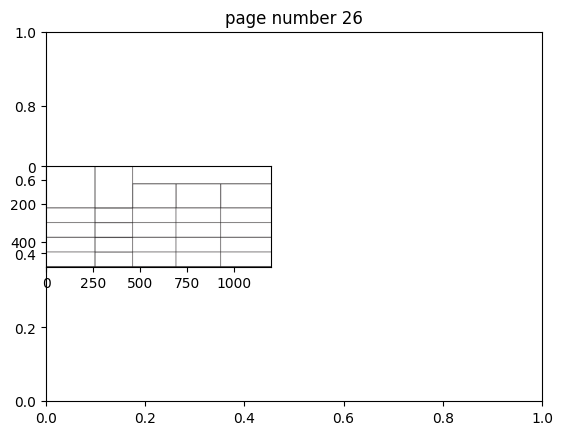

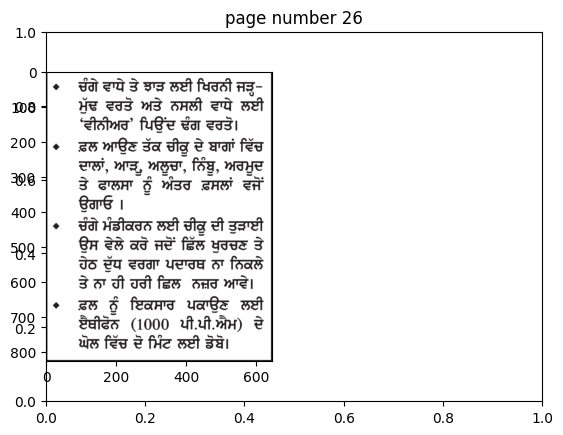

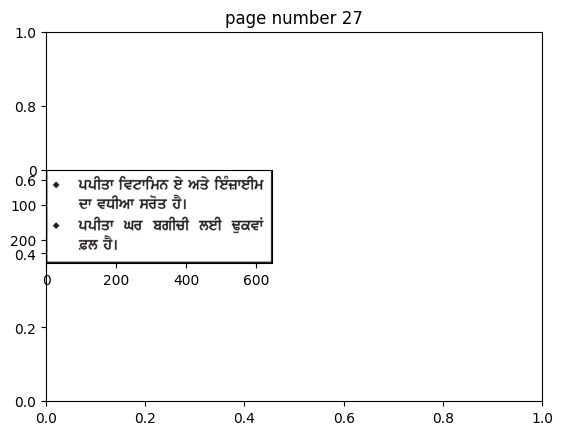

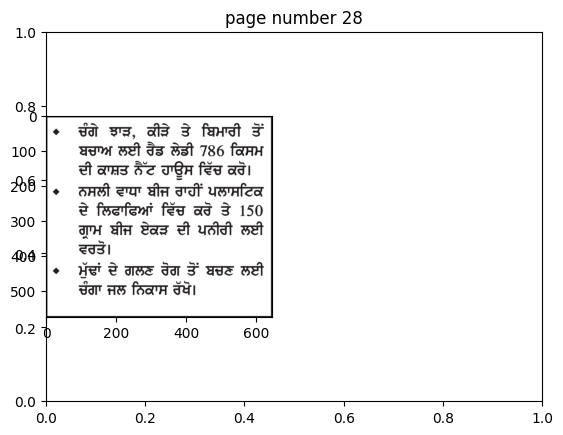

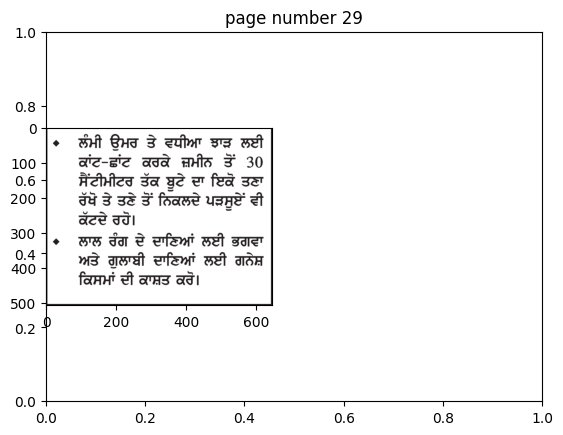

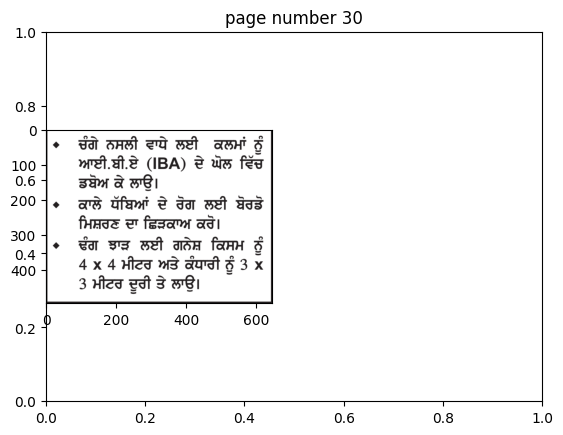

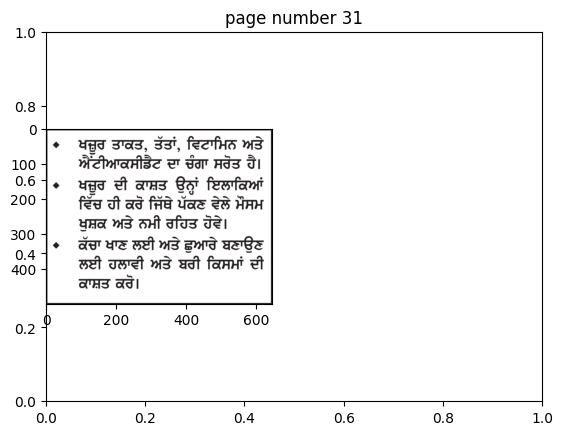

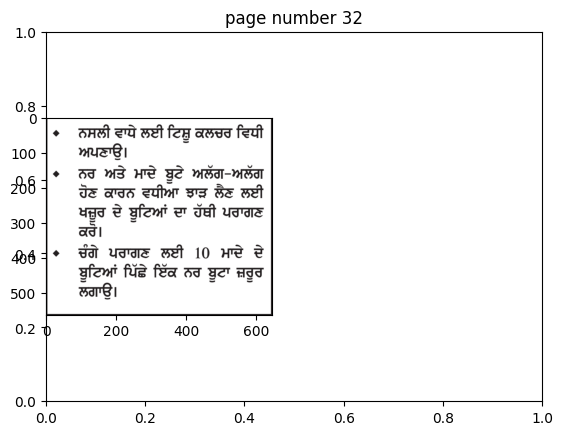

In [34]:
all_text=''
for idx,page in enumerate(tables):
    for table in page:
        all_text += f'page no {idx}\n'
        plt.title(f'page number {idx}')
        plt.subplot(121)
        plt.imshow(table)
        # plt.imshow(table)
        plt.show()
        kernel = np.ones((3,3),np.uint8)
        table = cv2.erode(table, kernel, iterations = 1)
        cell_image = cv2.cvtColor(table, cv2.COLOR_BGR2GRAY) 
        # cell_image = cv2.resize(cell_image,(np.shape(cell_image)[1]*2,np.shape(cell_image)[0]*3),cv2.INTER_LINEAR)
        cell_image = cv2.resize(cell_image,(np.shape(cell_image)[1]*3,np.shape(cell_image)[0]*3),cv2.INTER_LINEAR)
    #     cell_image = cv2.resize(cell_image,(np.shape(cell_image)[1]//2,np.shape(cell_image)[0]//3),cv2.INTER_LINEAR)
        cell_image = cv2.threshold(cell_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) [1]
        all_text+=pt.image_to_string(cell_image,config='--psm 6',lang='pan')
        all_text+="\n\n\n"

In [35]:
f=open("data_books/ocr_punjabi/pp_fruits_notes.txt",'a+')
f.write(all_text)
f.close()

In [4]:
images = convert_from_path('data_books/punjabi/pp_veg_notes_pbi.pdf',dpi=300)
tables = [get_tables(np.array(image)) for image in images]

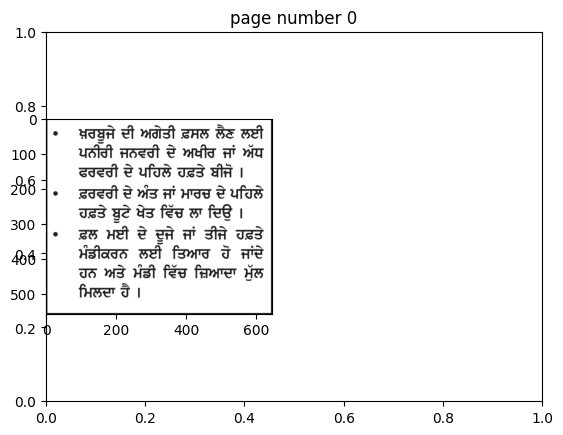

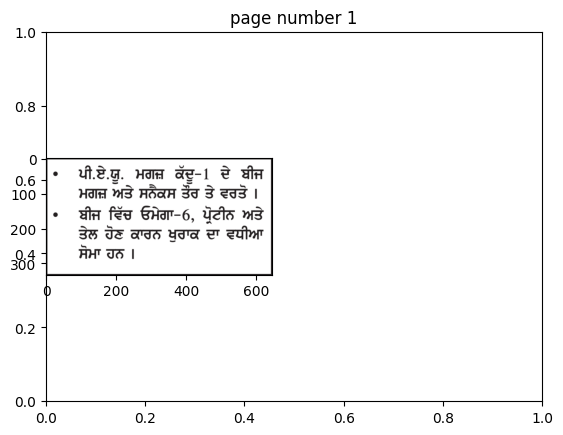

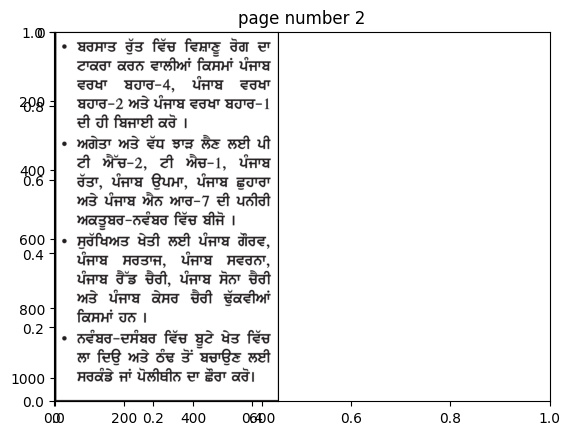

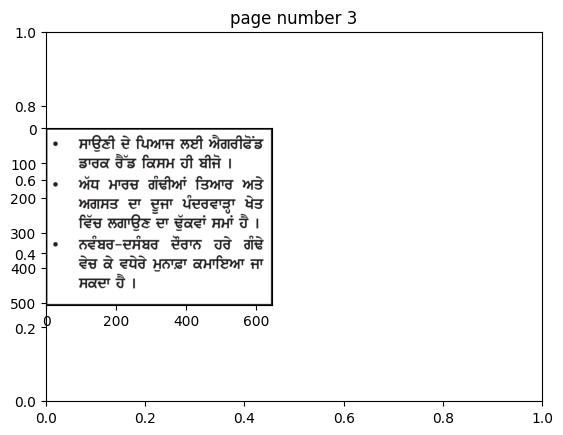

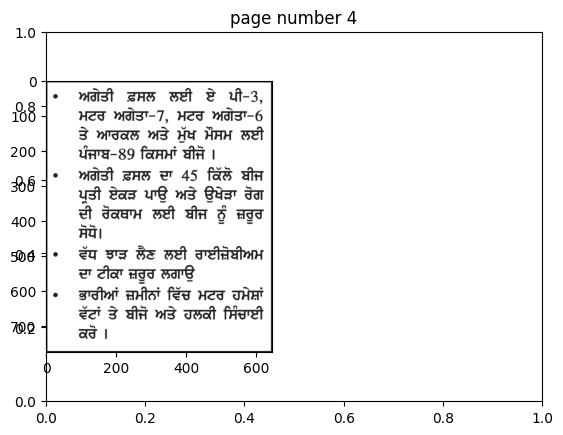

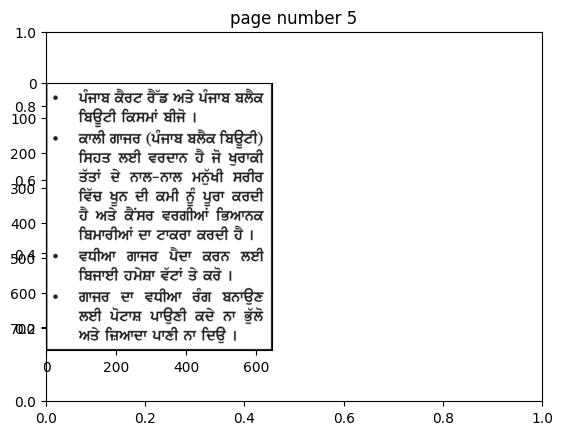

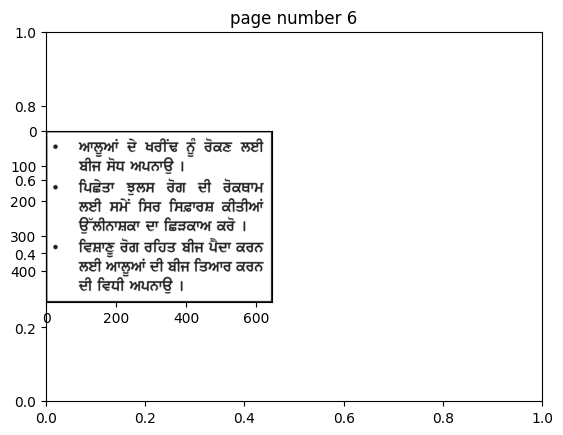

In [5]:
all_text=''
for idx,page in enumerate(tables):
    for table in page:
        all_text += f'page no {idx}\n'
        plt.title(f'page number {idx}')
        plt.subplot(121)
        plt.imshow(table)
        # plt.imshow(table)
        plt.show()
        kernel = np.ones((3,3),np.uint8)
        table = cv2.erode(table, kernel, iterations = 1)
        cell_image = cv2.cvtColor(table, cv2.COLOR_BGR2GRAY) 
        # cell_image = cv2.resize(cell_image,(np.shape(cell_image)[1]*2,np.shape(cell_image)[0]*3),cv2.INTER_LINEAR)
        cell_image = cv2.resize(cell_image,(np.shape(cell_image)[1]*3,np.shape(cell_image)[0]*3),cv2.INTER_LINEAR)
    #     cell_image = cv2.resize(cell_image,(np.shape(cell_image)[1]//2,np.shape(cell_image)[0]//3),cv2.INTER_LINEAR)
        cell_image = cv2.threshold(cell_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) [1]
        all_text+=pt.image_to_string(cell_image,config='--psm 6',lang='pan')
        all_text+="\n\n\n"

In [7]:
print(all_text)

page no 0
< _ ਖ਼ਰਬੂਜੇ ਦੀ ਅਗੇਤੀ ਫ਼ਸਲ ਲੈਣ ਲਈ
ਪਨੀਰੀ ਜਨਵਰੀ ਦੇ ਅਖੀਰ ਜਾਂ ਅਧ
ਫਰਵਰੀ ਦੇ ਪਹਿਲੇ ਹਫ਼ਤੇ ਬੀਜੋ ।

 _ ਫ਼ਰਵਰੀ ਦੇ ਅੰਤ ਜਾਂ ਮਾਰਚ ਦੇ ਪਹਿਲੇ
ਹਫ਼ਤੇ ਬੂਟੇ ਖੇਤ ਵਿੱਚ ਲਾ ਦਿਉ ।

੦ ਫ਼ਲ ਮਈ ਦੇ ਦੂਜੇ ਜਾਂ ਤੀਜੇ ਹਫ਼ਤੇ
ਮੰਡੀਕਰਨ ਲਈ ਤਿਆਰ ਹੋ ਜਾਂਦੇ
ਮਿਲਦਾ ਹੈ ।



page no 1
੦ _ਪੀ.ਏ.ਯੂ. ਮਗਜ਼ ਕੌਂਦੂ-1 ਦੇ ਬੀਜ
ਮਗਜ਼ ਅਤੇ ਸਨੈਕਸ ਤੌਰ ਤੇ ਵਰਤੋ ।

< _ ਬੀਜ ਵਿੱਚ ਓਮੇਗਾ-6, ਪ੍ਰੋਟੀਨ ਅਤੇ
ਤੇਲ ਹੋਣ ਕਾਰਨ ਖੁਰਾਕ ਦਾ ਵਧੀਆ
ਸੋਮਾ ਹਨ ।



page no 2
< ਬ੍ਰਸਾਤ ਰੁੱਤ ਵਿੱਚ ਵਿਸ਼ਾਣੂ ਰੋਗ ਦਾ
ਵਰਖਾ _ਬਹਾਰ-4, ਪੰਜਾਬ ਵਰਖਾ
ਬਹਾਰ-2 ਅਤੇ ਪੰਜਾਬ ਵਰਖਾ ਬਹਾਰ-1
ਦੀ ਹੀ ਬਿਜਾਈ ਕਰੋ ।

੦ ਅਗੇਤਾ ਅਤੇ ਵੱਧ ਝਾੜ ਲੈਣ ਲਈ ਪੀ
ਟੀ ਐੱਚ-2, ਟੀ ਐਚ-1, ਪੰਜਾਬ
ਅਤੇ ਪੰਜਾਬ ਐਨ ਆਰ-7? ਦੀ ਪਨੀਰੀ
ਅਕਤੂਬਰ-ਨਵੰਬਰ ਵਿੱਚ ਬੀਜੋ ।

੦ ਸੁਰੱਖਿਅਤ ਖੋਤੀ ਲਈ ਪੰਜਾਬ ਗੌਰਵ,
ਕਿਸਮਾਂ ਹਨ ।

੦ ਨਵੰਬਰ-ਦਸੰਬਰ ਵਿੱਚ ਬੂਟੇ ਖੋਤ ਵਿੱਚ
ਲਾ ਦਿਉ ਅਤੇ ਠੰਢ ਤੋਂ ਬਚਾਉਣ ਲਈ
ਸਰਕੰਡੇ ਜਾਂ ਪੋਲੀਥੀਨ ਦਾ ਛੌਰਾ ਕਰੋ।



page no 3
੦ _ ਸਾਉਣੀ ਦੇ ਪਿਆਜ ਲਈ ਐਗਰੀਫੋਂਡ
ਡਾਰਕ ਰੈੱਡ ਕਿਸਮ ਹੀ ਬੀਜੋ ।

੪ ਅੱਧ ਮਾਰਚ ਗੱਢੀਅ ਤਿਆਰ ਅਤੇ
ਅਗਸਤ ਦਾ ਦੂਜਾ ਪੰਦਰਵਾੜ੍ਹਾ
ਵਿੱਚ ਲਗਾਉਣ ਦਾ ਢੁੱਕਵਾਂ ਸਮਾਂ ਹੈ ।

< _ ਨਵੰਬਰ-ਦਸੰਬਰ ਦੌਰਾਨ ਹਰੇ ਗੰਢੇ
ਵੇਚ ਕੇ ਵਧੇਰੇ ਮੁਨਾਫ਼ਾ ਕਮਾਇਆ ਜਾ
ਸਕਦਾ ਹੈ ।



page no 4
੦ _ ਅੰਗੇਤੀ ਫ਼ਸਲ 

In [ ]:
f=open("data_books/ocr_punjabi/pp_veg_notes.txt",'w')
f.write(all_text)
f.close()